# Python libraries
- Scientific Computation
  - NumPy
  - SciPy: functions for linear algebra, optimization, integration and statistics (built on top of NumPy)
  - Statsmodels
  - Pandas: "relational" data. Series (one dimension) and Data Frames (two dimensional)
- Data Visualization
  - MatplotLib
  - Seaborn: complimentary to Matplotlib. targets statistical data visualizations
- Machine Learning
  - Scikit-Learn
- Deep Learning (Keras / TensorFlow)
  - TensorFlow: data flow graph computations
  - Keras: neural networks. Can use Theano or TensorFlow

# Pandas

In [1]:
import pandas as pd

df = pd.read_csv('Data/ACS_16_5YR_B24011_with_ann.csv', usecols=['GEO.id', 'GEO.id2'], encoding='latin-1')
# df = df.drop(0)
df.head(2)

,GEO.id,GEO.id2
0,Id,Id2
1,0500000US01001,01001


In [2]:
# excel sheet names
workbook = pd.ExcelFile('Data/Yelp_Selected_Businesses.xlsx')
workbook.sheet_names

['Biz_id_RESDU',
 'Biz_id_4JNXU',
 'Biz_id_YJ8lj',
 'Biz_id_ujHia',
 'Biz_id_na4Th']

In [3]:
# save results
df.to_csv('NewSavedView.csv', index=False) #Notice how we have to pass index=False if we do not want it included in our output

In [4]:
# supress scientific notation
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# max rows / columns
# pd.options.display.max_rows = 99999
# pd.options.display.max_columns = 99999

## Series and Data Frames

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('Data/turnstile_180901.txt')
print(len(df))
# df.info()

4848


In [6]:
def contains_n(text):
    return 'N' in text

df['On_N_Line'] = df.LINENAME.map(contains_n)

In [7]:
df.columns

# change column data types
df.ENTRIES = df.ENTRIES.astype(int)
df.ENTRIES.dtype

# dates
# iloc slicing series / dataframes
print(df.DATE.iloc[0])
# pd.to_datetime(df.DATE, format='%m/%d/%Y').head()
pd.to_datetime(df.DATE).head()
# dt methods
df.DATE = pd.to_datetime(df.DATE)
df.DATE.dt.day_name().head()

08/25/2018


0    Saturday
1    Saturday
2    Saturday
3    Saturday
4    Saturday
Name: DATE, dtype: object

In [8]:
# rename / drop columns, set new index
df = df.rename(columns = {'DATE': 'date'})
df.columns = [col.title().strip() for col in df.columns]
# df = df.drop('C/A', axis = 1) # If you don't pass the axis=1 parameter, pandas will try and drop a row with the specified index
# df = df.set_index('UNIT')
# df = df.reset_index()
df.head()

,C/A,Unit,Scp,Station,Linename,Division,Date,Time,Desc,Entries,Exits,On_N_Line
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,2018-08-25,00:00:00,REGULAR,6736067,2283184,True
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,2018-08-25,04:00:00,REGULAR,6736087,2283188,True
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,2018-08-25,08:00:00,REGULAR,6736105,2283229,True
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,2018-08-25,12:00:00,REGULAR,6736180,2283314,True
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,2018-08-25,16:00:00,REGULAR,6736349,2283384,True


,Dayofweek,Entries,Exits,On_N_Line
0,0,47654287167.000,44923086816,701.000
1,1,47630982077.000,44906956142,699.000
2,2,47588290875.000,44856581430,684.000
3,3,47720494256.000,44934228508,700.000
4,4,47590678266.000,44858474046,684.000
5,5,47588621464.000,44853949433,690.000
6,6,47589244683.000,44854509635,690.000


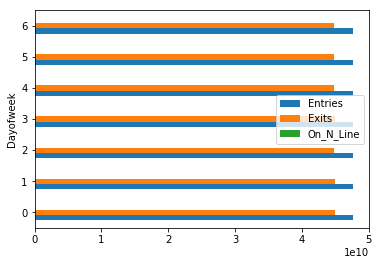

In [9]:
df.Date = pd.to_datetime(df.Date)
df['Dayofweek'] = df.Date.dt.dayofweek
grouped = df.groupby('Dayofweek').sum()
grouped.plot(kind = 'barh')
grouped = grouped.reset_index()
grouped

,Dayofweek,Entries,Exits,On_N_Line
IsWeekend,,,,
False,2.000,47636946528.200,44895865388.400,693.600
True,5.500,47588933073.500,44854229534.000,690.000


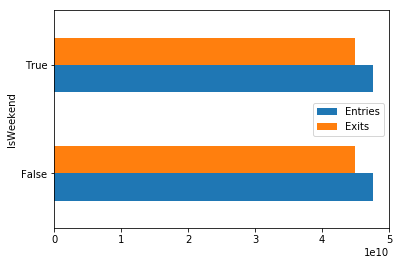

In [10]:
grouped['IsWeekend'] = grouped.Dayofweek.map({0:False,1:False,2:False,3:False,4:False,5:True,6:True})
wkend = grouped.groupby('IsWeekend').mean()
display(wkend)
wkend[['Entries', 'Exits']].plot(kind='barh')

## Accessing Data

In [11]:
# dataframes

df.head()
df.tail()
# df.info()
df.index
df.dtypes
df.columns
df.shape

df.iloc[5:80, 2:10] # integer-location based indexing
# df.loc[:, 'Linename'] # label-location based indexing
# or
df['Linename']
# boolean indexing
display(df.loc[(df['Entries'] > 7740888) & (df['Exits'] > 1367254), ['Station', 'Entries', 'Exits']][0:10])

# update values
df.loc[df['Entries'] > 7740888, ['Station']] = 'Station4'

# create new column
# df.loc[df['Entries'] > 7740888, 'NewCol'] = 'Busy'

,Station,Entries,Exits
295,59 ST,10964211,1367258
296,59 ST,10964268,1367261
297,59 ST,10964438,1367285
298,59 ST,10964772,1367303
299,59 ST,10965307,1367311
300,59 ST,10965692,1367317
301,59 ST,10965767,1367318
302,59 ST,10965821,1367321
303,59 ST,10966055,1367336
304,59 ST,10966439,1367348


In [12]:
# series

linenames = df['Linename']
linenames.unique()
linenames.nunique()

6

## Statistical Methods

In [13]:
df.describe()
df.mean()
df['Entries'].mean()
df['Entries'].quantile(.9) # get the value for 90% quantile for a specific column
df['Entries'].count()
df['Entries'].std()
df['Entries'].sum()
# pd.options.display.max_rows = 99999
# display(df['Entries'].cumsum()) # the cumulative sum, where each cell index contains the sum of all indices lower than, and including, itself
df['Station'].unique()
df['Station'].value_counts()

Station4           1435
49 ST               759
5 AV/59 ST          468
23 ST               426
59 ST               420
28 ST               382
TIMES SQ-42 ST      308
57 ST-7 AV          291
14 ST-UNION SQ      192
34 ST-HERALD SQ     167
Name: Station, dtype: int64

### .apply() / .applymap()

In [14]:
# convert every value in the DataFrame to a string
string_df = df.applymap(lambda x: str(x))
string_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4848 entries, 0 to 4847
Data columns (total 13 columns):
C/A          4848 non-null object
Unit         4848 non-null object
Scp          4848 non-null object
Station      4848 non-null object
Linename     4848 non-null object
Division     4848 non-null object
Date         4848 non-null object
Time         4848 non-null object
Desc         4848 non-null object
Entries      4848 non-null object
Exits        4848 non-null object
On_N_Line    4848 non-null object
Dayofweek    4848 non-null object
dtypes: object(13)
memory usage: 492.5+ KB


In [18]:
df['Entries'].apply(lambda x: x+1)[0:1]

0    6736068
Name: Entries, dtype: int64

## Matplotlib Custom Visualizations

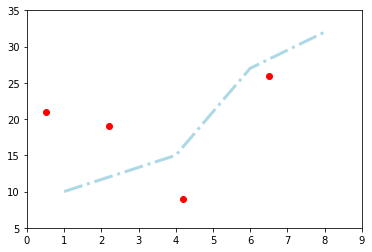

In [21]:
# multiplot
new_figure = plt.figure()
ax = new_figure.add_subplot(111) # number of rows (1), the number of columns (1) and the plot number (1)
ax.plot([1, 4, 6, 8], [10, 15, 27, 32], color='lightblue', linewidth=3, linestyle = '-.')
ax.scatter([0.5, 2.2, 4.2, 6.5], [21, 19, 9, 26], color='red', marker='o')
ax.set_xlim(0, 9), ax.set_ylim(5,35)
plt.show()

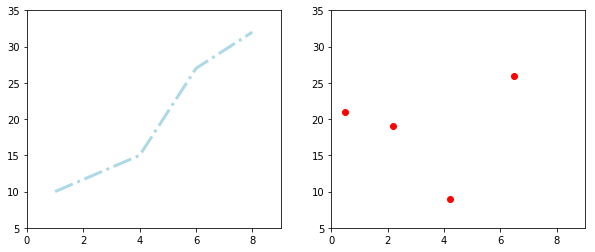

In [23]:
# subplots
new_figure = plt.figure(figsize=(10,4))
ax = new_figure.add_subplot(121)
ax2 = new_figure.add_subplot(122)
ax.plot([1, 4, 6, 8], [10, 15, 27, 32], color='lightblue', linewidth=3, linestyle = '-.')
ax2.scatter([0.5, 2.2, 4.2, 6.5], [21, 19, 9, 26], color='red', marker='o')
ax.set_xlim(0, 9), ax.set_ylim(5,35)
ax2.set_xlim(0, 9), ax2.set_ylim(5,35)
plt.show()

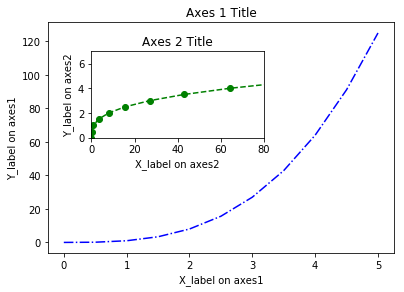

In [12]:
import numpy as np

# add_axes (absolute) vs add_subplot (relative)
x = np.linspace(0, 5, 11)
y = x ** 3

figure = plt.figure()
ax1 = figure.add_axes([0.1, 0.1, 0.8, 0.8]) # main axes
ax2 = figure.add_axes([0.2, 0.5, 0.4, 0.3]) # inset axes

# larger figure
ax1.plot(x, y, color = 'blue', linestyle = '-.')
ax1.set_xlabel('X_label on axes1')
ax1.set_ylabel('Y_label on axes1')
ax1.set_title('Axes 1 Title')

# smaller figure
ax2.plot(y, x, color = 'green', linestyle = '--', marker = 'o')
ax2.set_xlabel('X_label on axes2')
ax2.set_ylabel('Y_label on axes2')
ax2.set_title('Axes 2 Title')

# set ranges
ax2.set_xlim(0, 80)
ax2.set_ylim(0, 7)

plt.show()

## Data Visualization with Pandas

<IPython.core.display.Javascript object>


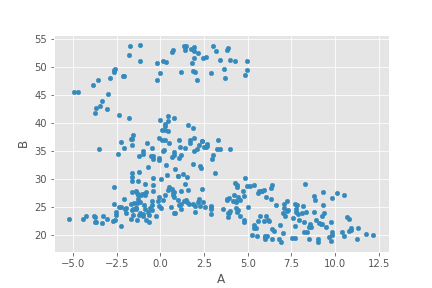

In [23]:
import pandas as pd
import numpy as np
%matplotlib notebook

plt.style.use('ggplot')

np.random.seed(777)

data = pd.DataFrame({'A':np.random.randn(365).cumsum(),
                    'B':np.random.randn(365).cumsum() + 25,
                    'C':np.random.randn(365).cumsum() - 25}, 
                     index = pd.date_range('1/1/2018', periods = 365))

# ; removes the '<matplotlib.axes._subplots.AxesSubplot at 0x8985400>' after the chart
data.plot('A', 'B', kind = 'SCATTER');

Chart types: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html

‘line’ : line plot (default)
‘bar’ : vertical bar plot
‘barh’ : horizontal bar plot
‘hist’ : histogram
‘box’ : boxplot
‘kde’ : Kernel Density Estimation plot
‘density’ : same as ‘kde’
‘area’ : area plot
‘pie’ : pie plot
‘scatter’ : scatter plot
‘hexbin’ : hexbin plot

<IPython.core.display.Javascript object>


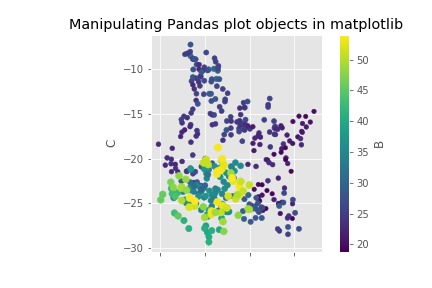

Text(0.5, 1.0, 'Manipulating Pandas plot objects in matplotlib')

In [30]:
# colormaps: https://matplotlib.org/examples/color/colormaps_reference.html
ax = data.plot.scatter('A', 'C', c = 'B', s = data['B'], colormap = 'viridis');
# setting the aspect ratio to equal allows the viewer to easily see that the range of series A is much smaller than series C
ax.set_aspect('equal')
ax.set_title('Manipulating Pandas plot objects in matplotlib')

<IPython.core.display.Javascript object>


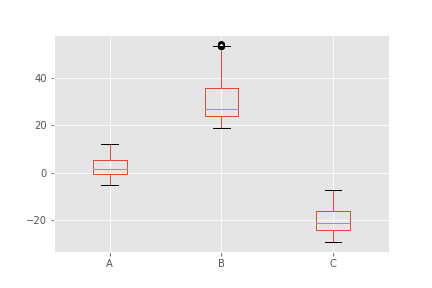

<IPython.core.display.Javascript object>


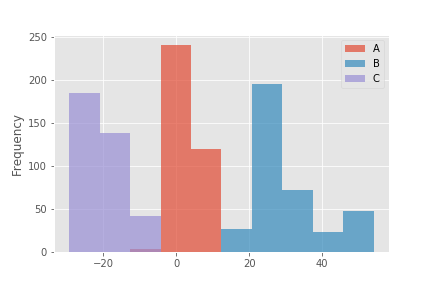

<IPython.core.display.Javascript object>


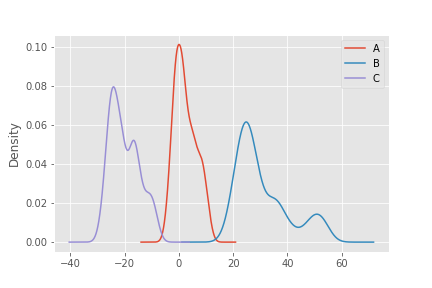

In [39]:
data.plot.box();
data.plot.hist(alpha = 0.7); # setting alpha level to inspect distribution overlap
data.plot.kde();

### Visualizing High Dimensional Data
#### Scatter Matrix

<IPython.core.display.Javascript object>


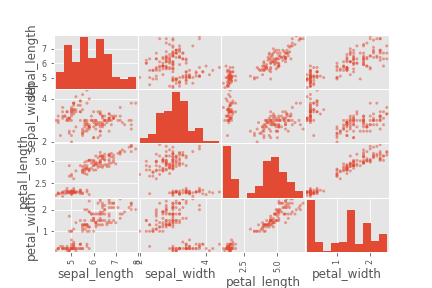

In [43]:
iris = pd.read_csv('Data/iris.csv')
pd.plotting.scatter_matrix(iris);

#### Parallel Plots

<IPython.core.display.Javascript object>


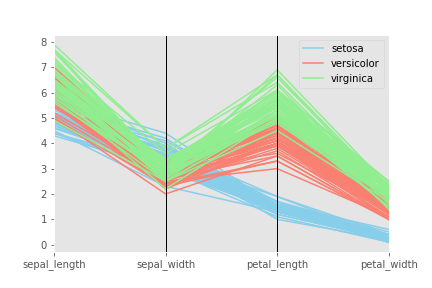

In [44]:
colormap = ('skyblue', 'salmon', 'lightgreen')
plt.figure()
pd.plotting.parallel_coordinates(iris, 'species', color = colormap);